**Problem Statement :**

1.   Perform EDA on Titanic dataset.



In [ ]:
pip install joblib


In [57]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [58]:
#Importing Libraries
# for basic mathematics operation 
import pandas as pd
import numpy as np

# for visualizations
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline


In [110]:
# importing the dataset
df=pd.read_csv('/content/gdrive/My Drive/titanic.csv')
print(df.head(4))

   survived  pclass     sex   age  ...  deck  embark_town  alive  alone
0         0       3    male  22.0  ...   NaN  Southampton     no  False
1         1       1  female  38.0  ...     C    Cherbourg    yes  False
2         1       3  female  26.0  ...   NaN  Southampton    yes   True
3         1       1  female  35.0  ...     C  Southampton    yes  False

[4 rows x 15 columns]


In [112]:
#.shape will give you over all Columns and rows associated with the dataset
df.shape 

(891, 15)

In [113]:
#.describe() summarizes the count, mean, standard deviation, min, and max for numeric variables.
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [60]:
# checking if there is any NULL data
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Dropping unwanted Columns

Analysis:
    1.Since Age,deck and embark_town has more '0' values we can remove those columns from the dataset.

In [61]:
df=df.drop('deck',axis=1)

In [62]:
df=df.drop('embark_town',axis=1)

In [63]:
df=df.drop('embarked',axis=1)

In [64]:
df=df.drop('age',axis=1)

In [65]:
#Checking again if there is any NULL data
df.isnull().sum()

survived      0
pclass        0
sex           0
sibsp         0
parch         0
fare          0
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64

In [66]:
df["alive"].head()

0     no
1    yes
2    yes
3    yes
4     no
Name: alive, dtype: object

**Data** **Visualization**


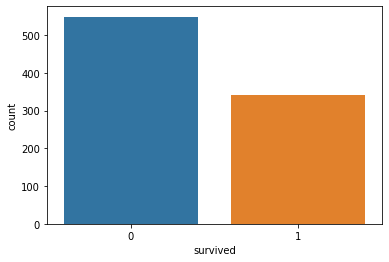

In [67]:
sns.countplot(x='survived',data=df)
plt.show()

Analysis:

1.   More than 550 did not survied and hardly around 350 survived
   


   

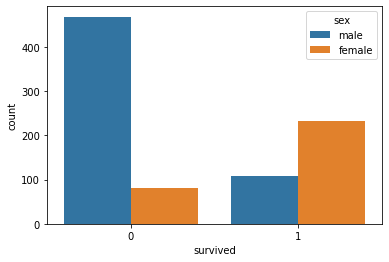

In [68]:
sns.countplot(x="survived",hue="sex",data=df)
plt.show()

Analysis:

1.   From the above graph we can observe that most of the 'Male' did not survived.
2.   So Most of the 'Females' are alive.


        
        
   


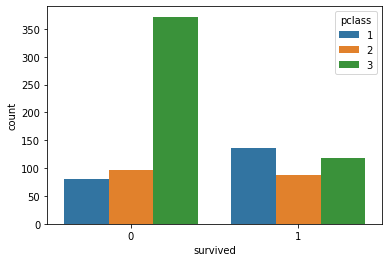

In [69]:
sns.countplot(x="survived",hue="pclass",data=df)
plt.show()


Analysis:
1.  As we can see most of the people who belongs to 3rd class did not survive.
2.  1st class and 2nd class passengers are more likely to be alive than 3rd class.




  


In [70]:
df=df.drop('who',axis=1) #We can get this data in sex

In [71]:
df=df.drop('adult_male',axis=1) # We can get this data in Sex 

In [72]:
df=df.drop('alive',axis=1) #Because it is as same as Survived

In [73]:
df=df.drop('alone',axis=1) #we can get it in Parch or Sibsp

In [74]:
df=df.drop('class',axis=1) #Class is as same as Pclass so it is not necessary

In [75]:
df.isnull().sum()

survived    0
pclass      0
sex         0
sibsp       0
parch       0
fare        0
dtype: int64

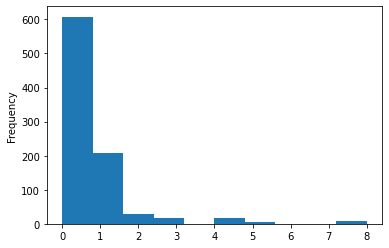

In [76]:
#Ploting histogram for analysing sibsp
df['sibsp'].plot.hist()
plt.show()

Analysis:

1.   As we can see most of the siblings/spouse is zero ,it is not much needed for the model.



    

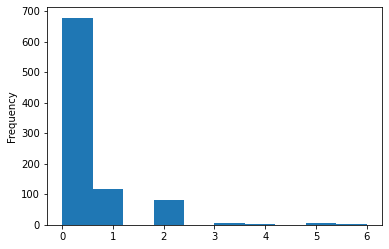

In [77]:
#Ploting histogram for analysing Parch
df['parch'].plot.hist()
plt.show()

Analysis:

1.   Here also mos of the parets/children is zero,we can avoid this columns.



    

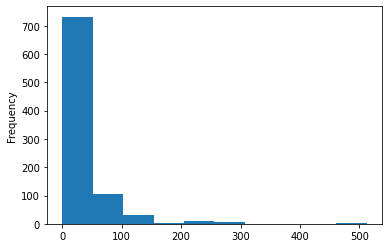

In [78]:
#Plotting histogram for analysing Fare
df['fare'].plot.hist()
plt.show()

Analysis:

1.  Most of the fare is between 0 to 100 and max is 300 but it is very less.



   

In [79]:
#After removing Unwanted columns
df.head()

,survived,pclass,sex,sibsp,parch,fare
0,0,3,male,1,0,7.2500
1,1,1,female,1,0,71.2833
2,1,3,female,0,0,7.9250
3,1,1,female,1,0,53.1000
4,0,3,male,0,0,8.0500


In [80]:
# Pre-Processing the data
from sklearn.preprocessing import LabelEncoder

As column Sex conatins string value we have to do data preprocessing inorder to convert string into integer value. Here We are using LabelEncoder.

In [81]:
l1=LabelEncoder()
df['sex']=l1.fit_transform(df['sex'])

In [82]:
#Splitting Dependent and Independent Variables into two different variables.
x=df.drop('survived',axis=1)
y=df['survived']

In [83]:
x.head()

,pclass,sex,sibsp,parch,fare
0,3,1,1,0,7.2500
1,1,0,1,0,71.2833
2,3,0,0,0,7.9250
3,1,0,1,0,53.1000
4,3,1,0,0,8.0500


In [84]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [85]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,test_size=0.2)

In [87]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(712, 5)
(712,)
(179, 5)
(179,)


***Logistic Regression***

In [88]:
# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
algo=LogisticRegression()


In [89]:
algo.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
#Predicting the result 
ypred=algo.predict(x_test)

In [91]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

In [92]:
confusion_matrix(y_test,ypred)

array([[101,  11],
       [ 30,  37]])

Analysis:

1.  Through this confusion matrix we can see that our model is not that bad,as actual_true and predicted_true are better than
    actual_true and predicted_false.
2.   Similary we can say actual_false and predicted _false is better than actual_false and predicted_true.
3.   So we can conclude that our model has on an average accuracy. 


    

In [38]:
#Checking the Accuracy
from sklearn.metrics import accuracy_score

In [39]:
print(accuracy_score(y_test,ypred))

0.7486033519553073


In [93]:
#Saving the trained model
import joblib

In [94]:
joblib.dump(algo,r'/content/gdrive/My Drive/trainset.pkl')

['/content/gdrive/My Drive/trainset.pkl']

In [95]:
joblib.dump(l1,r"/content/gdrive/My Drive/LabelEncoder.pkl")

['/content/gdrive/My Drive/LabelEncoder.pkl']

In [96]:
model=joblib.load("/content/gdrive/My Drive/trainset.pkl")

In [97]:
en=joblib.load('/content/gdrive/My Drive/LabelEncoder.pkl')

In [98]:
#Importing library
import numpy as np

In [99]:
# Checking the result for new set of Data
new=np.array([[1,'male',1,0,75000]])
df=pd.DataFrame(new)

In [100]:
df.head()

,0,1,2,3,4
0,1,male,1,0,75000


In [101]:
df[1]=en.transform(df[1]) #Data preprocessing 
df
model.predict(df)   #predicting wheather person is alive or not                 

                    

array([1])

According to the new data values the person is not alive.


**Decision** **Tree**

In [102]:
# Training the Decision Tree model on the Training set
from sklearn.tree import DecisionTreeClassifier,plot_tree
algo1=DecisionTreeClassifier(criterion='entropy',max_depth=4)
algo1.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

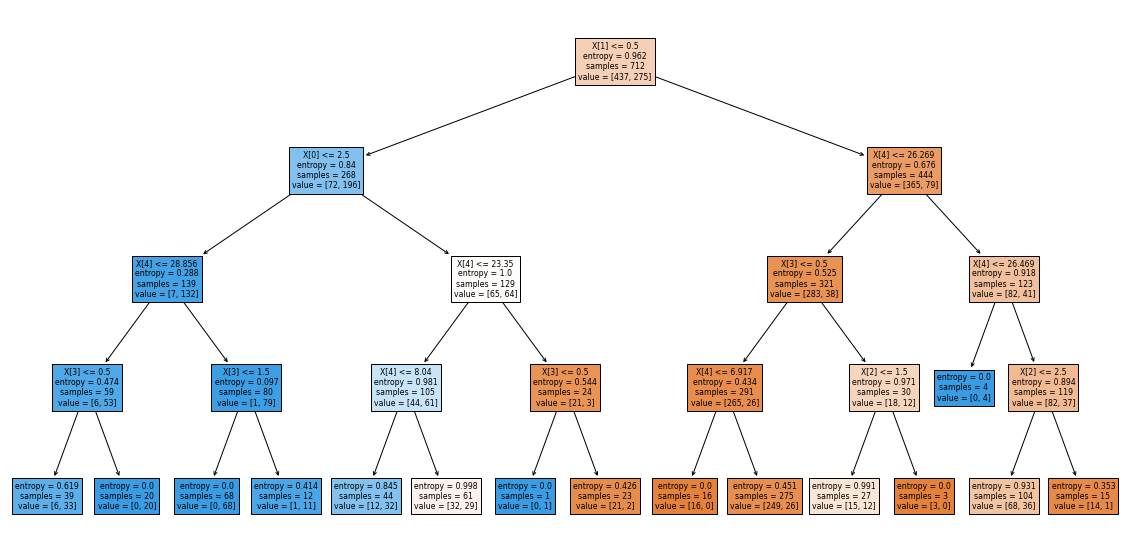

In [103]:
#Ploting Decision tree
plt.figure(figsize=(20,10))
plot_tree(algo1,filled=True)
plt.show()

In [104]:
# Making the Confusion Matrix and Checking the Accuracy
from sklearn.metrics import accuracy_score,confusion_matrix
ypred=algo1.predict(x_test)
print(accuracy_score(y_test,ypred))
print(confusion_matrix(y_test,ypred))

0.770949720670391
[[107   5]
 [ 36  31]]


**Random Forest**

In [105]:
# Training the Random Forest model on the Training set
from sklearn.ensemble import RandomForestClassifier
algo2=RandomForestClassifier(criterion='entropy',n_estimators=10)

In [106]:
#Fitting the train set and predicting the result.
algo2.fit(x_train,y_train)
ypred1=algo2.predict(x_test)

In [108]:
# Making the Confusion Matrix and Checking the Accuracy
print(confusion_matrix(y_test,ypred1))
print(accuracy_score(y_test,ypred1))

[[105   7]
 [ 30  37]]
0.7932960893854749


As we can see,

*   Logistic Regression's accuracy is : 0.7486033519553073
*   Decision Tree's  accuracy is      : 0.770949720670391
*   Random Forest's  accuracy is      : 0.7932960893854749

So Random Forest algorithm fits the best for titanic dataset.
